In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
data = pd.read_csv('iris.data', header=None)

In [49]:
data[4] = pd.Categorical(data[4]).codes

In [50]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
x, y = np.split(data.values, (4,), axis=1)
print x.shape,y.shape

(150L, 4L) (150L, 1L)


In [52]:
# 仅使用前两个特征
x = x[:, :2]

## 建模

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [54]:
lr = Pipeline([
    ('sc', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('clf', LogisticRegression())
])

In [55]:
lr.fit(x, y.ravel())

Pipeline(steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [56]:
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
print 'y_hat =', y_hat
print 'y_hat_prob', y_hat_prob
print '准确度: %.2f%%' % (100 * np.mean(y_hat == y.ravel()))

y_hat = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  2.  1.  2.  1.  2.  1.  2.  2.
  1.  1.  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  1.  2.  2.  2.  1.  2.
  2.  2.  1.  2.  2.  1.]
y_hat_prob [[  9.73498697e-01   1.84257154e-02   8.07558779e-03]
 [  8.55035680e-01   9.53865858e-02   4.95777340e-02]
 [  9.84620235e-01   8.31338564e-03   7.06637973e-03]
 [  9.86111906e-01   5.60638379e-03   8.28171048e-03]
 [  9.94800499e-01   3.33962270e-03   1.85987786e-03]
 [  9.95486884e-01   2.91680547e-04   4.22143578e-03]
 [  9.98680146e-01   7.11886058e-04   6.0796822

## 绘图

In [64]:
# 以下几段都是绘制背景涂色
# x轴，特征1
# y轴，特征2
M, N = 500, 500
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
t1 = np.linspace(x1_min, x1_max, M)
t2 = np.linspace(x2_min, x2_max, N)
#x1 的每一行是t1，行数是t2的长度
#x2 的每一列是t2，列数是t1的长度
x1, x2 = np.meshgrid(t1, t2)
print x1.shape,x2.shape

#flat将所有数值展开，变成一个ndarray
#stack 合并
x_test = np.stack((x1.flat, x2.flat), axis=1)

(500L, 500L) (500L, 500L)


In [58]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
cm_light = mpl.colors.ListedColormap(['#77E0A0','#FF8080','#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g','r','b'])

In [59]:
#预测
y_hat = lr.predict(x_test)
#使之与输入形状相同
y_hat = y_hat.reshape(x1.shape)

In [60]:
import matplotlib.patches as mpatches

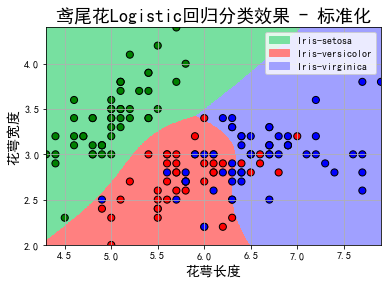

In [65]:
# 预测值的显示
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)
# 样本的显示
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)

plt.xlabel(u'花萼长度', fontsize=14)
plt.ylabel(u'花萼宽度', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()

patchs = [
    mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
    mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
    mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
plt.legend(handles=patchs, fancybox=True, framealpha=0.8)
plt.title(u'鸢尾花Logistic回归分类效果 - 标准化', fontsize=18)
plt.show()